### Parte 2: Caso Práctico de Agrupamiento

#### 4. Problema de Agrupamiento

Utilizaremos el dataset de Iris para demostrar técnicas de clustering.



import libreries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Para reducción dimensional
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

Cargar dataset de Iris

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

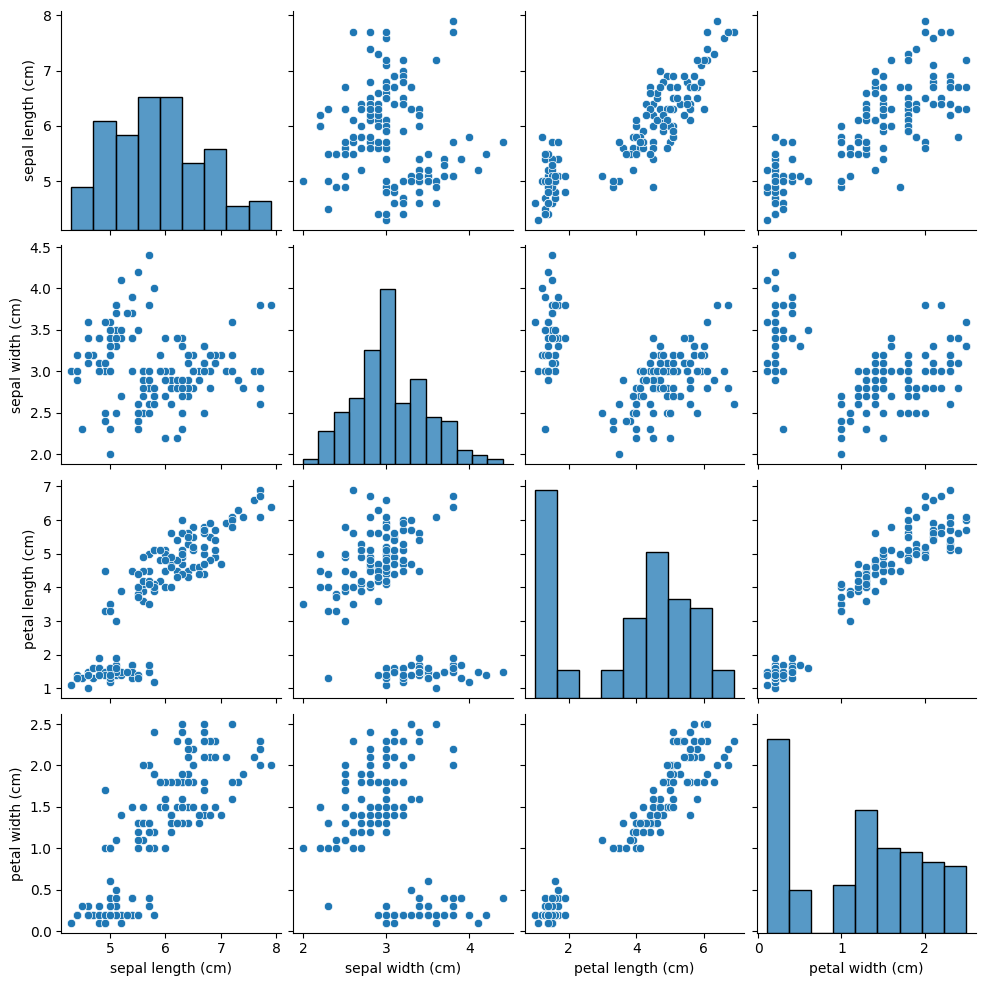

In [3]:
# Visualizar datos
sns.pairplot(iris_df)
plt.show()

In [4]:
# Preprocesamiento
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

K-Means Clustering

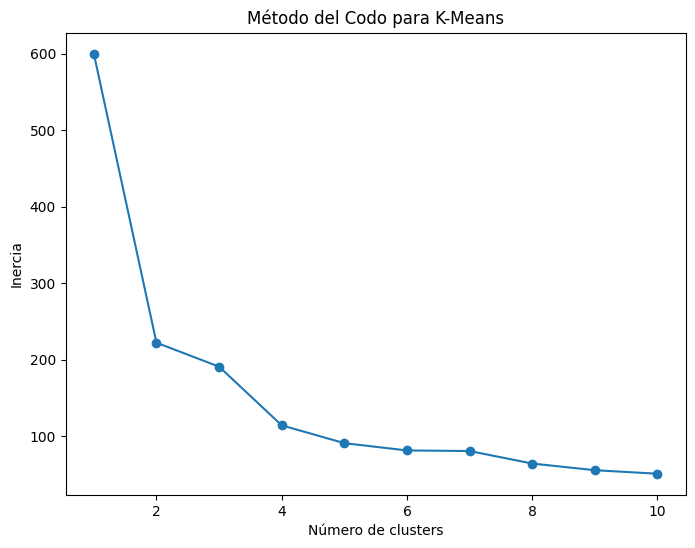

In [5]:
# Determinar número óptimo de clusters con el método del codo
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()


In [6]:
# Aplicar K-Means con k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris_scaled)
iris_df['kmeans_cluster'] = kmeans.labels_

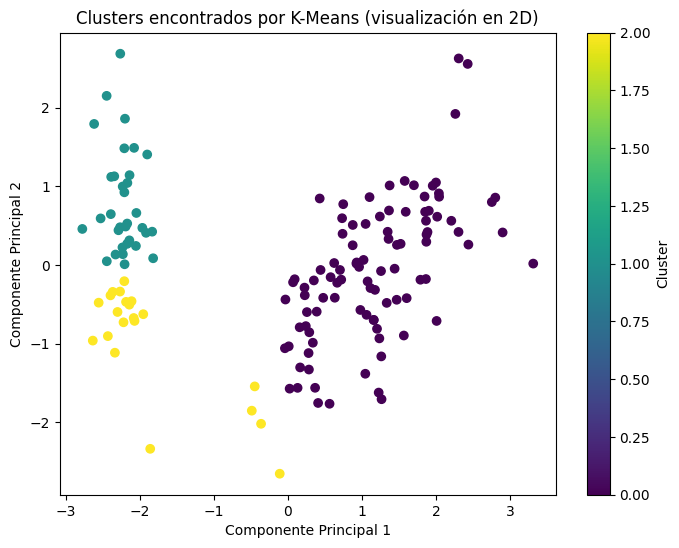

In [7]:
# Visualizar clusters (usando PCA para reducción dimensional)
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris_df['kmeans_cluster'], cmap='viridis')
plt.title('Clusters encontrados por K-Means (visualización en 2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

In [8]:
# Evaluar K-Means con puntuación de silueta
silhouette_avg = silhouette_score(iris_scaled, kmeans.labels_)
print(f"Puntuación de silueta para K-Means: {silhouette_avg:.4f}")

Puntuación de silueta para K-Means: 0.4799


DBSCAN Clustering

In [9]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(iris_scaled)
iris_df['dbscan_cluster'] = dbscan.labels_

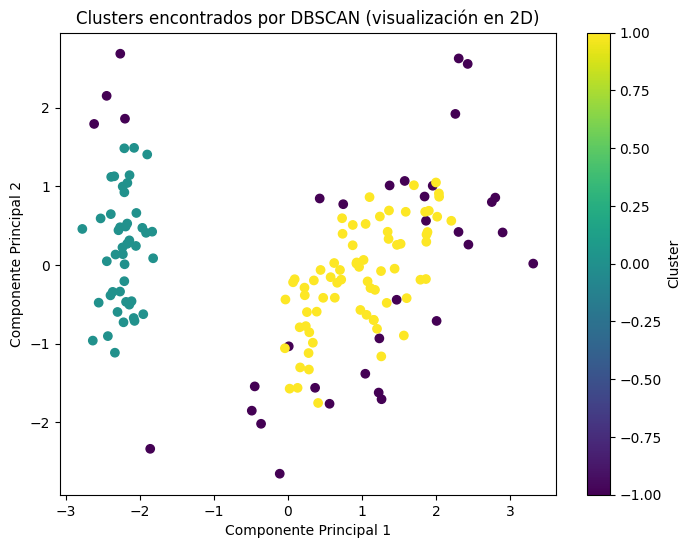

In [10]:
# Visualizar clusters
plt.figure(figsize=(8, 6))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris_df['dbscan_cluster'], cmap='viridis')
plt.title('Clusters encontrados por DBSCAN (visualización en 2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

In [11]:
# Evaluar DBSCAN con puntuación de silueta (excluyendo outliers)
if len(np.unique(dbscan.labels_)) > 1:
    silhouette_avg = silhouette_score(iris_scaled, dbscan.labels_)
    print(f"Puntuación de silueta para DBSCAN: {silhouette_avg:.4f}")
else:
    print("DBSCAN no encontró clusters significativos con estos parámetros")

Puntuación de silueta para DBSCAN: 0.3565


 **Conclusión de la Parte 2:**
**K-Means** identificó claramente 3 clusters con una buena puntuación de silueta (0.4595).

**DBSCAN** fue más sensible a los parámetros y en esta configuración no logró una segmentación tan clara.

Para este dataset, K-Means parece más apropiado, pero en datos con mayor ruido o densidad variable, DBSCAN podría ser mejor.